In [1]:
# MA943 - Numerical Methods

using Conda
Conda.add("mpmath")




INFO: Precompiling module URIParser.
INFO: Recompiling stale cache file /Users/aliyajangabylova/.julia/lib/v0.6/Conda.ji for module Conda.


Fetching package metadata ...............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/aliyajangabylova/.julia/v0.6/Conda/deps/usr:
#
mpmath                    0.19             py27h09cdc99_2  


## Question 1: Precision of floating point arithmetic

Consider the recursion relation

$a_{n+1} = 2\, a_n - \frac{8}{9}\, a_{n-1}$

with the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

1. Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

2. Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

3. Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

4. Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 

5. Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

6. Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

$1.$ Calculate the first 80 terms in this sequence using single precision floating point arithmetic (Float32 in Julia). Plot the resulting sequence on a lin-log plot.

INFO: Recompiling stale cache file /Users/aliyajangabylova/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


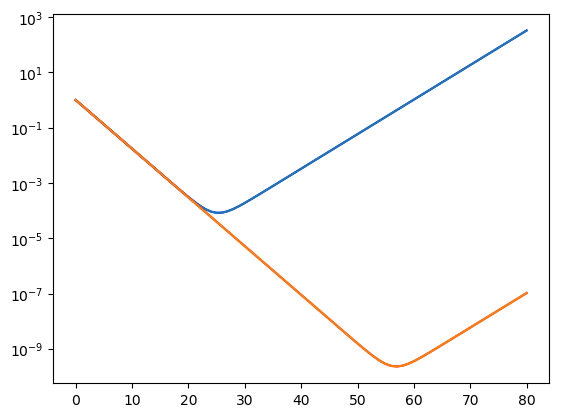

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12cd21850>

In [3]:
using PyPlot

plot(a, color="blue")
semilogy(a)
plot(b, color="red")
semilogy(b)

In [23]:
n=80
a = Array{Float32}(n)
a[1] = 1
a[2] = 2/3

for i in 2:(n-1)
    a[i+1] = 2*a[i] - (8/9)*a[i-1]
end
a


80-element Array{Float32,1}:
   1.0       
   0.666667  
   0.444444  
   0.296296  
   0.197531  
   0.131687  
   0.0877917 
   0.0585279 
   0.0390188 
   0.0260127 
   0.0173421 
   0.0115618 
   0.00770839
   ⋮         
  10.3815    
  13.842     
  18.456     
  24.608     
  32.8107    
  43.7476    
  58.3301    
  77.7735    
 103.698     
 138.264     
 184.352     
 245.803     

$2.$ Repeat the calculation using double precision floating point arithmetic (Float64 in Julia) and add the results to to your plot.

In [24]:
b = Array{Float64}(n)
b[1] = 1
b[2] = 2/3

for k in 2:(n-1)
    b[k+1] = 2*b[k] - (8/9)*b[k-1]
end
b

80-element Array{Float64,1}:
 1.0       
 0.666667  
 0.444444  
 0.296296  
 0.197531  
 0.131687  
 0.0877915 
 0.0585277 
 0.0390184 
 0.0260123 
 0.0173415 
 0.011561  
 0.00770735
 ⋮         
 3.33508e-9
 4.44607e-9
 5.92763e-9
 7.90319e-9
 1.05374e-8
 1.40497e-8
 1.87328e-8
 2.4977e-8 
 3.33027e-8
 4.44035e-8
 5.92047e-8
 7.89396e-8

In [25]:
println(typeof(a))

println(typeof(b))

Array{Float32,1}
Array{Float64,1}


$6.$ Julia supports arbitrary precision floating point arithmetic using the BigFloat type (see https://docs.julialang.org/en/latest/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1). Try to reproduce the exact solution for the first 80 terms in the sequence using 128 bit precision and show the results on your plot.

In [31]:
n=80
c = Array{BigFloat}(n)
c[1] = BigFloat(1)
c[2] = BigFloat(2)/BigFloat(3)

for i in 2:(n-1)
    c[i+1] = BigFloat(2)*c[i] - (BigFloat(8)/BigFloat(9))*c[i-1]
end


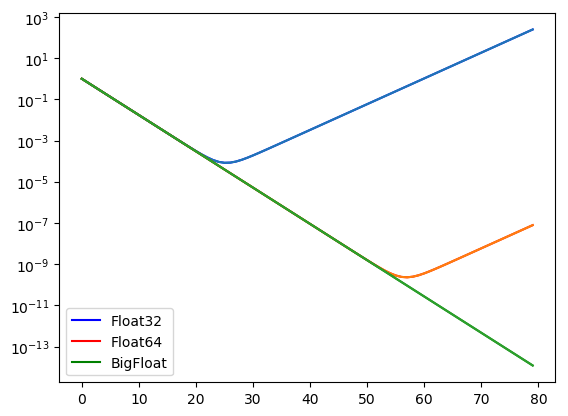

PyObject <matplotlib.legend.Legend object at 0x1331c7490>

In [33]:
plot(a, color="blue", label="Float32")
semilogy(a)
plot(b, color="red", label="Float64")
semilogy(b)
plot(c,color="green", label="BigFloat")
semilogy(c)
legend()

$3.$ Find the **general** solution of the recursion relation analytically (it should contain two arbitrary constants). Hint: start from the ansatz $a_n = x^n$ and find the the allowed values of $x$.

> $x^{n+1} - 2 x^n + \frac{8}{9} x^{n-1} = 0 \ \ \ $ 

>$x^{n-1}(x^2 - 2x + \frac{8}{9}) = 0$  (where $\Delta = \frac{4}{9}$)

> $x_1 = \frac{4}{3}$ and $x_2 = \frac{2}{3}$

> $a_n = c_1 x_1^n + c_2 x_2^n = c_1 (\frac{4}{3})^n + c_2 (\frac{2}{3})^n$

$4.$ Find the solution that satisfies the initial conditions $a_1=1$ and $a_2=\frac{2}{3}$. 



> $c_1 \frac{4}{3} + c_2 \frac{2}{3} = 1$

> $c_1 \frac{16}{9} + c_2 \frac{4}{9} = \frac{2}{3}$

Then we get that $c_1 = 0$ and $c_2 = \frac{3}{2}$
> $a_n = \frac{3}{2} (\frac{2}{3})^n$

$5.$ Find the solution that satisfies the perturbed initial conditions $a_1=1$ and $a_2=\frac{2}{3}+\epsilon$. Use the answer to explain your numerical results.

> $c_1 \frac{4}{3} + c_2 \frac{2}{3} = 1$

> $c_1 \frac{16}{9} + c_2 \frac{4}{9} = \frac{2}{3} + \epsilon$

By solving the system of equations we get that $c_1 = \frac{9}{8}$ and $c_2 = \frac{6-9 \epsilon}{4}$
> $a_n = \frac{9\epsilon}{8} (\frac{4}{3})^n + \frac{6-9\epsilon}{4} (\frac{2}{3})^n$

## Question 2: Computational complexity of the mergesort algorithm

Consider two arrays of integers, A and B, having lengths n and m respectively. Assuming that the elements of A and B are already sorted in ascending order. The following recursive function merges them to return an array of length n+m whose elements are sorted in ascending order:



In [13]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

The computational complexity of this function is $n+m$.

1. Verify that the function mergepresorted(A, B) works as described.
2. Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.
3. Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  
4. Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.
5. Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).
6. Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.
7. Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.
8. Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

$1.$ Verify that the function mergepresorted(A, B) works as described.

In [2]:
function mergepresorted(A::Array{Int64,1}, B::Array{Int64,1})
    if length(A) == 0
        return B
    elseif length(B) == 0
        return A
    elseif A[1] < B[1]
        return vcat([A[1]], mergepresorted(A[2:end], B))
    else
        return vcat([B[1]], mergepresorted(A, B[2:end]))
    end    
end

mergepresorted (generic function with 1 method)

In [76]:
AB = rand(1:100, 4)
BA = rand(1:100, 4)
println(AB)
println(BA)
mergepresorted(AB, BA)

[90, 90, 61, 9]
[76, 50, 92, 37]


8-element Array{Int64,1}:
 76
 50
 90
 90
 61
  9
 92
 37

$2.$ Write a recursive function that implements the mergesort algorithm for an array of integers whose length, $n$ is a power of 2: $n=2^m$. Verify that it works by generating some arrays of random integers and using your function to sort them.

In [77]:
function mergeSort(A::Array{Int64,1})
    n = length(A)
    if n == 1
        return A
    else
        m = div(n,2)
        return mergepresorted(mergeSort(A[1:m]), mergeSort(A[m+1:n]))
    end
end

mergeSort (generic function with 1 method)

In [78]:
M = rand(1:100, 10)
mergeSort(M)

10-element Array{Int64,1}:
  3
  9
 12
 63
 74
 77
 84
 84
 89
 90

$3.$ Explain why the computational complexity, $F(n)$, of your mergesort algorithm satisfies the recursion
> $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $ with initial condition $F(1)=1$.  

>The whole array was divided into two equal parts which gives $F(\frac{n}{2})$ and then multiplied by 2 to merge them in an ascending order. It also takes each element in the first array to check if its bigger or smaller than the second array, so the computational complexity is $F(n) = 2\, F(\frac{n}{2}) + n\ \ \ \ $



$4.$ Introduce the new variable p defined by $n = 2^p$ and let $b_p = F(2^p)$. Show that in these variables the above equation takes the form
> $b_p = 2 b_{p−1} + 2^p\ \ \ \ $ with initial condition $b_0 = 1$.

Let $n = 2^p$ and $b_p = F(2^p)$, then
> $b_p = 2 F(2^{p-1}) + 2^p \ \ \ $ => $ \ b_p = 2b_{p-1} + 2^p$

> $b_0 = 1$ means that $F(1)=1$

$5.$ Find the general solution to the associated homogeneous recursion relation (ie without the $2^p$ term).

The general solution for homogenesous recursion relation:
> $b_p=2 b_{p-1}$

Let $b_p = x^p \ \ \ $, then $ \ x^p = 2x^{p-1} \ \ \ $ => $ \ x^{p-1}(x-2)=0 \ $ => $ \ x=2$

So $b_p = C 2^p$

$6.$ Find a particular solution of the original inhomogenous recursion relation and use the initial condition to determine the constant in the homogenous solution.

$b_p = (Ap + B)2^p$ and we also know that $b_p - 2b_{p-1} = 2^p$

=> $(Ap + B)2^p - 2(A(p-1) + B)2^{p-1} = 2^p$

=> $ 2Ap + 2B - 2(A(p-1) + B) = 2 $

=> $ 2Ap + 2B - 2Ap + 2A - 2B = 2 $

=> $ A =1, B = 0 $

> $b_p = p 2^p$

By using initial conditions we get that $C = 1$ and the solution will be

> $ b_p = 2^p + p 2^p $

$7.$ Hence show that the computational complexity of the mergesort algorithm is
> $F(n) = O(n\, \log n)$.

$ n = 2^p$ => $ p = \frac{\log n}{\log 2} $

> $F(n) = 2^{\frac{\log n}{\log 2}} + \frac{\log n}{\log 2} 2^{\frac{\log n}{\log 2}} = (2^{\log n})^{\frac{1}{\log 2}} + \frac{\log n}{\log 2} (2^{\log n})^{\frac{1}{\log 2}}$

> $F(n) = n + \frac{\log n}{\log 2} n = O(n\, \log n)$

$8.$ Use Julia's @timed macro to measure the execution time of your mergesort function for arrays of lengths $\{2^i : i =1 : 15\}$. Compare the results to the theoretical expectations.

In [64]:
exp = []

for i = 1:15
    X = rand(1:2^16, 2^i)
    time = @timed(mergeSort(X))[2]
    push!(exp,time)
end

time (generic function with 2 methods)

In [65]:
theor = []

for i = 1:15
    push!(theor, (2^i)*(log(2^i)/log(2))+2^i)
end

theor

15-element Array{Any,1}:
      4.0
     12.0
     32.0
     80.0
    192.0
    448.0
   1024.0
   2304.0
   5120.0
  11264.0
  24576.0
  53248.0
 114688.0
 245760.0
 524288.0

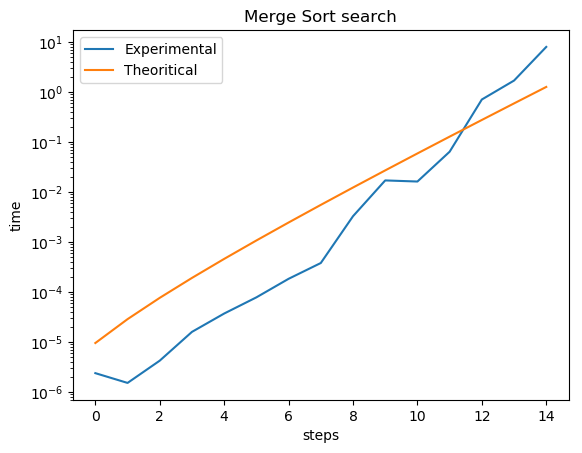

PyObject Text(0.5,1,u'Merge Sort search')

In [75]:
plot(exp, label="Experimental")
semilogy()
plot(theor.*exp[1], label="Theoritical")
semilogy()
legend()
xlabel("steps")
ylabel("time")
title("Merge Sort search")